# Pipeline for constant mass ALP models

This notebook demonstrates the complete pipeline for constant mass ALP models.

## Module loading

Automatically load the modules if they are modified.

In [1]:
%load_ext autoreload
%autoreload 2

Load standard modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import natpy as nat
import h5py

In [3]:
plt.rcParams.update({"figure.dpi": 150})

Load `alpfrag` modules.

In [4]:
import alpfrag.cosmology as cosmology
import alpfrag.models as models
import alpfrag.potentials as potentials

## Simulation parameters

Let us use the default cosmology.

In [5]:
cosmo = cosmology.Cosmology()

The simulation time $t_m$ at which the simulation starts.

In [6]:
tm_initial = 1e-3

The simulation time $t_m$ at which the full mode function evolution is matched to the latetime evolution of the density contrast. Note that due to the averaging procedure the exact matching time is slightly different compared to this value, but it is fairly close. 

In [7]:
tm_final = 1e3

The list of dimensionless momenta $\tilde{k}$ to simulate.

In [8]:
kt_list_test = np.array([0.05, 1.2, 5.])
kt_list = np.geomspace(0.05, 5., 300)

## Quadratic potential, i.e. free ALP (test)

We consider an ALP with a quadratic potential in Standard Misalignment. The initial angle is arbitrary.

In [9]:
quad_model = models.StandardALP(4.2, potentials.Free(), cosmo=cosmo, m0=1e-22*nat.eV)

We start by solving for the background evolution.

In [10]:
quad_model.bg_field_evolve(tm_initial, tm_final)

Now we evolve the mode functions. 

In [11]:
quad_model.pt_modes_evolve(kt_list_test)

Get the density contrast evolutions to check whether everyhing is reasonable.

In [12]:
quad_dc_evals = [quad_model.get_dc_evolution(i) for i in range(len(quad_model.kt_list))]

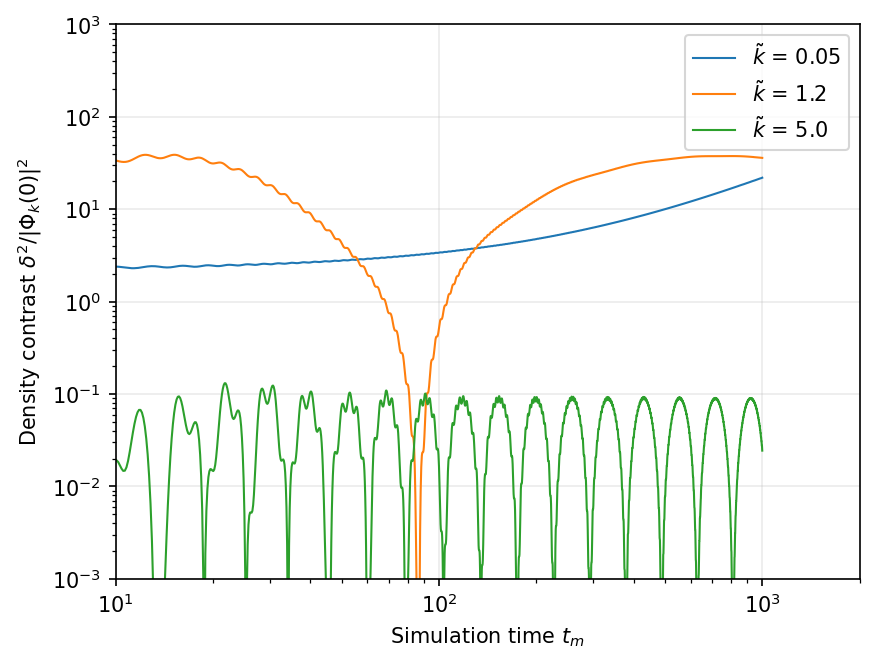

In [13]:
for i, kt in enumerate(quad_model.kt_list):
    plt.loglog(quad_dc_evals[i][0], quad_dc_evals[i][1]**2, lw=1, label=r"$\tilde{k}$ = " + str(kt))
plt.xlabel(r'Simulation time $t_m$')
plt.ylabel(r'Density contrast $\delta^2/\vert\Phi_k(0)\vert^2$')
plt.grid(alpha=0.25)
plt.legend()
plt.xlim(1e1, 2e3)
plt.ylim(1e-3, 1e3)
plt.show()

In [14]:
quad_to_be_saved = quad_model.pt_avg_dc_and_save()

Results saved in /home/cemeroncel/Code/alpfrag/results/smm_free_m1.00e-22_thi4.20_int_20230916123643.hdf5.


Now we get the latetime evolution.

In [15]:
quad_model.pt_dc_eval_latetime()

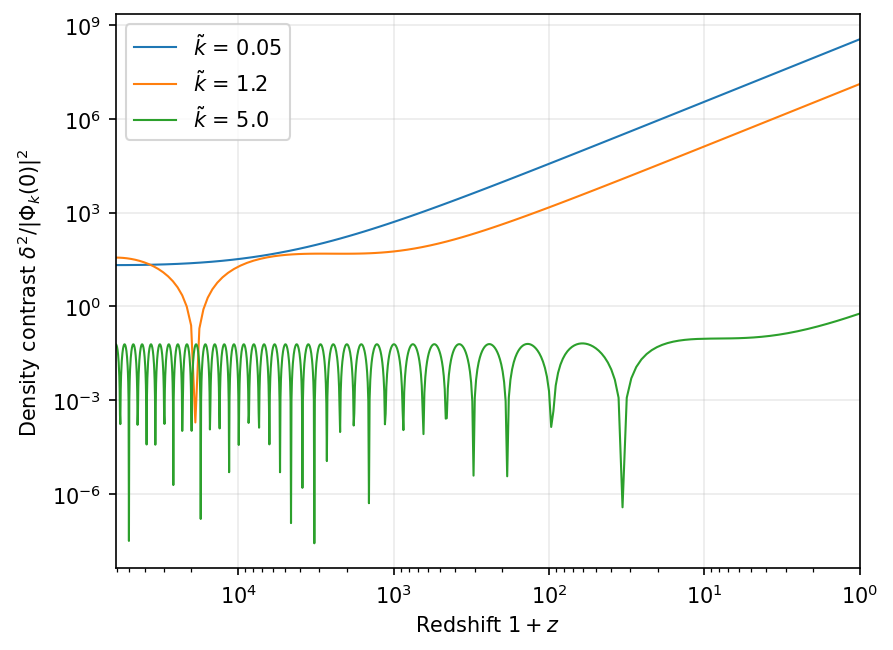

In [16]:
for i, kt in enumerate(quad_model.kt_list):
    plt.loglog(1. + quad_model.pt_dc_latetime[i]['z_arr'], quad_model.pt_dc_latetime[i]['delta']**2, lw=1, label=r"$\tilde{k}$ = " + str(kt))
plt.xlabel(r'Redshift $1 + z$')
plt.ylabel(r'Density contrast $\delta^2/\vert\Phi_k(0)\vert^2$')
plt.xlim(quad_model.pt_dc_latetime[0]['z_arr'][0] + 1., 1.)
plt.grid(alpha=0.25)
plt.legend()
plt.show()

Let us perform the matching at some earlier time to see if the transition between the two solutions is smooth.

In [27]:
quad_late_evals = [quad_model._pt_dc_eval_latetime_single(i, index=-42, step=1, tm_start=) for i in range(len(quad_model.kt_list))]

For the early time solution, convert $t_m$ values to redshift.

In [18]:
quad_model.convert_tm_to_redshift(quad_dc_evals[i][0][46])

627105.3865411314

In [19]:
z_early_list = [np.array([quad_model.convert_tm_to_redshift(quad_dc_evals[i][0][j]) for j in range(len(quad_dc_evals[i][0]))])
                for i in range(len(quad_model.kt_list))]

In [20]:
colors = ['tab:blue', 'tab:orange', 'tab:green']

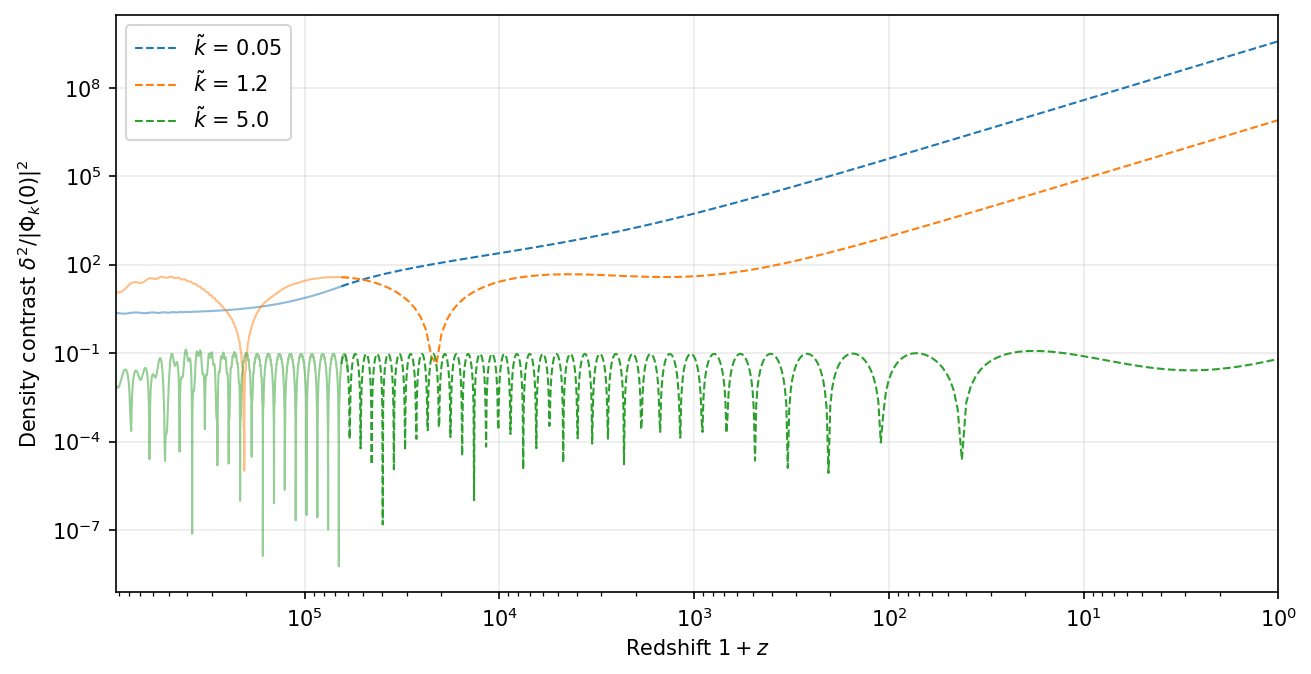

In [28]:
with plt.rc_context({"figure.figsize": [10., 5.]}):
    for i, kt in enumerate(quad_model.kt_list):
        plt.loglog(1. + z_early_list[i], quad_dc_evals[i][1]**2, lw=1, alpha=0.5, color=colors[i])
        plt.loglog(1. + quad_late_evals[i]['z_arr'], quad_late_evals[i]['delta']**2, lw=1, label=r"$\tilde{k}$ = " + str(kt), color=colors[i], ls='dashed')
    plt.xlabel(r'Redshift $1 + z$')
    plt.ylabel(r'Density contrast $\delta^2/\vert\Phi_k(0)\vert^2$')
    plt.xlim(z_early_list[0][0] + 1., 1.)
    plt.grid(alpha=0.25)
    plt.legend()
    plt.show()

# Quadratic potential

Define the model

In [9]:
quad_model = models.StandardALP(4.2, potentials.Free(), cosmo=cosmo, m0=1e-22*nat.eV)

Solve the background evolution

In [10]:
quad_model.bg_field_evolve(tm_initial, tm_final)

Evolve the mode functions

In [11]:
quad_model.pt_modes_evolve(kt_list)

Average the density contrast evolution and save

In [12]:
quad_dc_temp = quad_model.pt_avg_dc_and_save()

Results saved in /home/cemeroncel/Code/alpfrag/results/smm_free_m1.00e-22_thi4.20_int_20230916132625.hdf5.


Get the latetime evolution

In [15]:
quad_model.pt_dc_eval_latetime_direct(z_end=99)

In [17]:
for deg in [0.2, 1., 1.5, 2.5, 5.]:
    print(np.pi - deg/180.)

3.140481542478682
3.1360370980342376
3.13325932025646
3.1277037647009043
3.1138148758120154


# Cosine potential

We want to approximately reproduce the Figure 1 of https://arxiv.org/abs/1810.05930v1. So we use their values.

In [19]:
degs = [0.2, 1., 1.5, 2.5, 5.]

In [29]:
periodic = potentials.Periodic()

In [30]:
cosine_models = [models.StandardALP(np.pi - deg/180., periodic, cosmo=cosmo, m0=1.1e-22*nat.eV) for deg in degs]

Check whether the filenames are distinguishable

In [31]:
for model in cosine_models:
    print(model.fname_base)

smm_periodic_m1.10e-22_thi3.140
smm_periodic_m1.10e-22_thi3.136
smm_periodic_m1.10e-22_thi3.133
smm_periodic_m1.10e-22_thi3.128
smm_periodic_m1.10e-22_thi3.114


Run the whole pipeline for all the models.

In [32]:
for model in cosine_models:
    model.bg_field_evolve(tm_initial, tm_final)
    model.pt_modes_evolve(kt_list)
    model.pt_avg_dc_and_save()
    model.pt_dc_eval_latetime_direct(z_end=49)

Results saved in /home/cemeroncel/Code/alpfrag/results/smm_periodic_m1.10e-22_thi3.140_int_20230916141313.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_periodic_m1.10e-22_thi3.136_int_20230916142531.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_periodic_m1.10e-22_thi3.133_int_20230916143744.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_periodic_m1.10e-22_thi3.128_int_20230916144954.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_periodic_m1.10e-22_thi3.114_int_20230916150159.hdf5.


# Monodromy potential with $p=1/2$

In [33]:
theta_ini_mon_phalf = [1., 2., 3., 4., 5., 6., 7., 8.]

In [34]:
mon_phalf = potentials.NonPeriodic(p=0.5)

In [36]:
mon_phalf_models = [models.StandardALP(th_ini, mon_phalf, cosmo=cosmo, m0=1.1e-22*nat.eV) for th_ini in theta_ini_mon_phalf]

In [37]:
for model in mon_phalf_models:
    print(model.fname_base)

smm_non-periodic-p0.50_m1.10e-22_thi1.000
smm_non-periodic-p0.50_m1.10e-22_thi2.000
smm_non-periodic-p0.50_m1.10e-22_thi3.000
smm_non-periodic-p0.50_m1.10e-22_thi4.000
smm_non-periodic-p0.50_m1.10e-22_thi5.000
smm_non-periodic-p0.50_m1.10e-22_thi6.000
smm_non-periodic-p0.50_m1.10e-22_thi7.000
smm_non-periodic-p0.50_m1.10e-22_thi8.000


In [39]:
for model in mon_phalf_models:
    model.bg_field_evolve(tm_initial, tm_final)
    model.pt_modes_evolve(kt_list)
    model.pt_avg_dc_and_save()
    model.pt_dc_eval_latetime_direct(z_end=99)

Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi1.000_int_20230916152607.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi2.000_int_20230916153725.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi3.000_int_20230916154853.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi4.000_int_20230916160038.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi5.000_int_20230916161247.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi6.000_int_20230916162516.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi7.000_int_20230916163812.hdf5.
Results saved in /home/cemeroncel/Code/alpfrag/results/smm_non-periodic-p0.50_m1.10e-22_thi8.000_int_20230916165132.hdf5.
